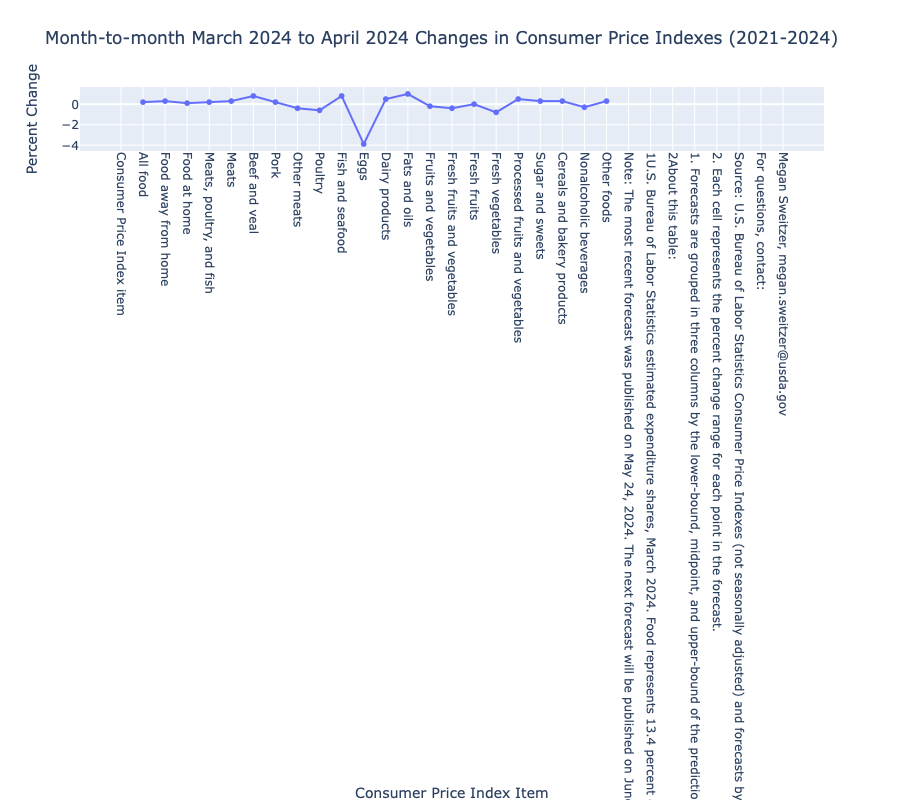

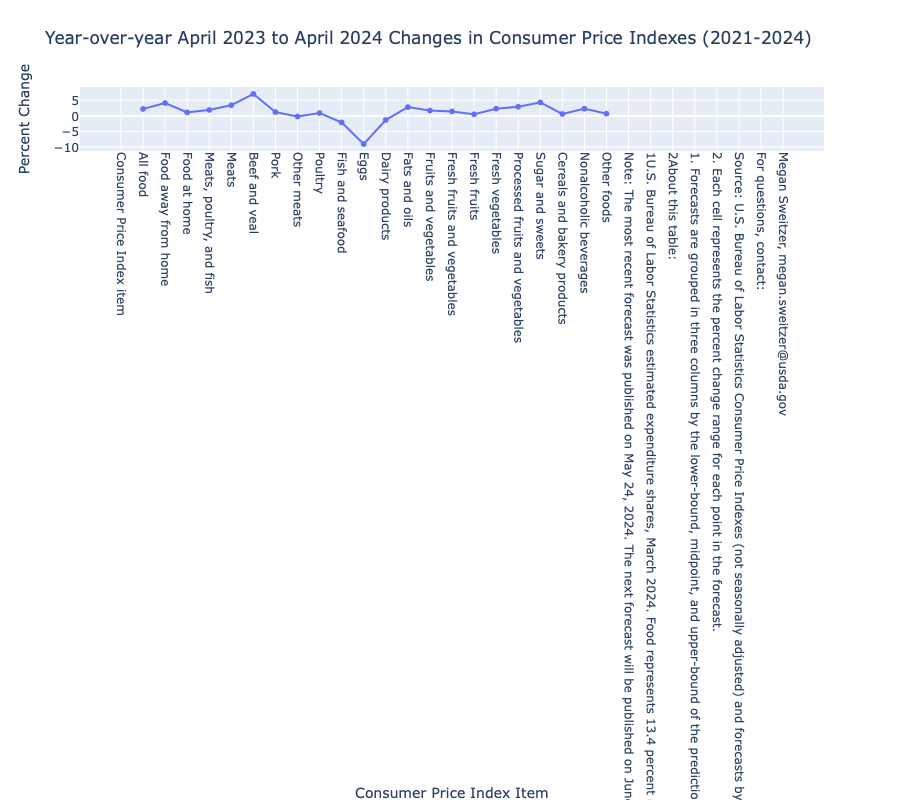

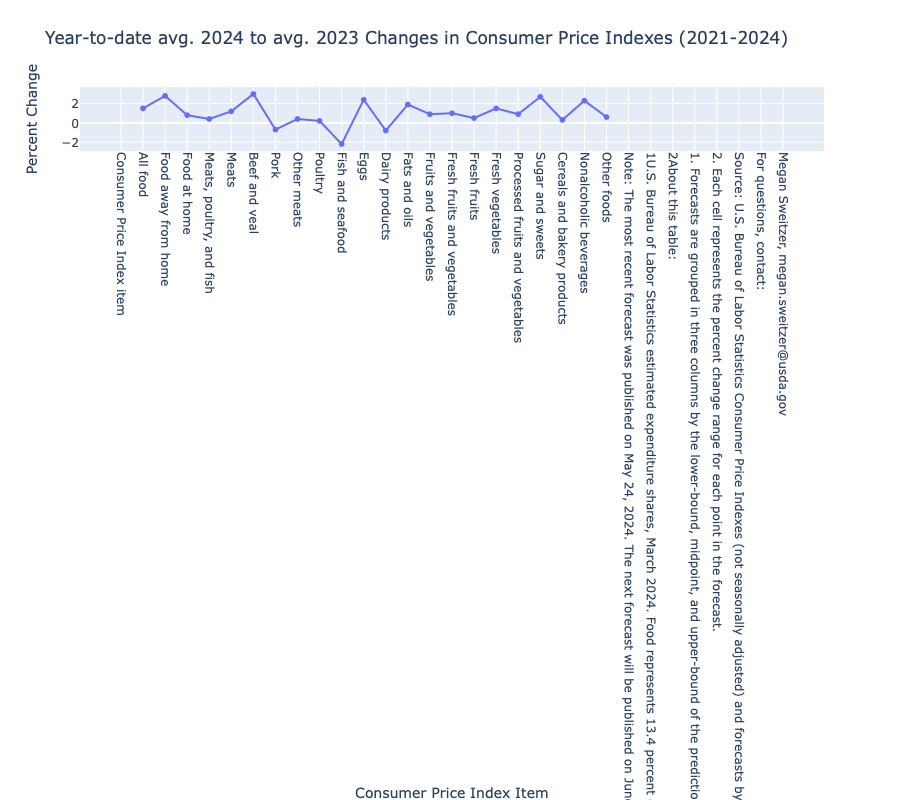

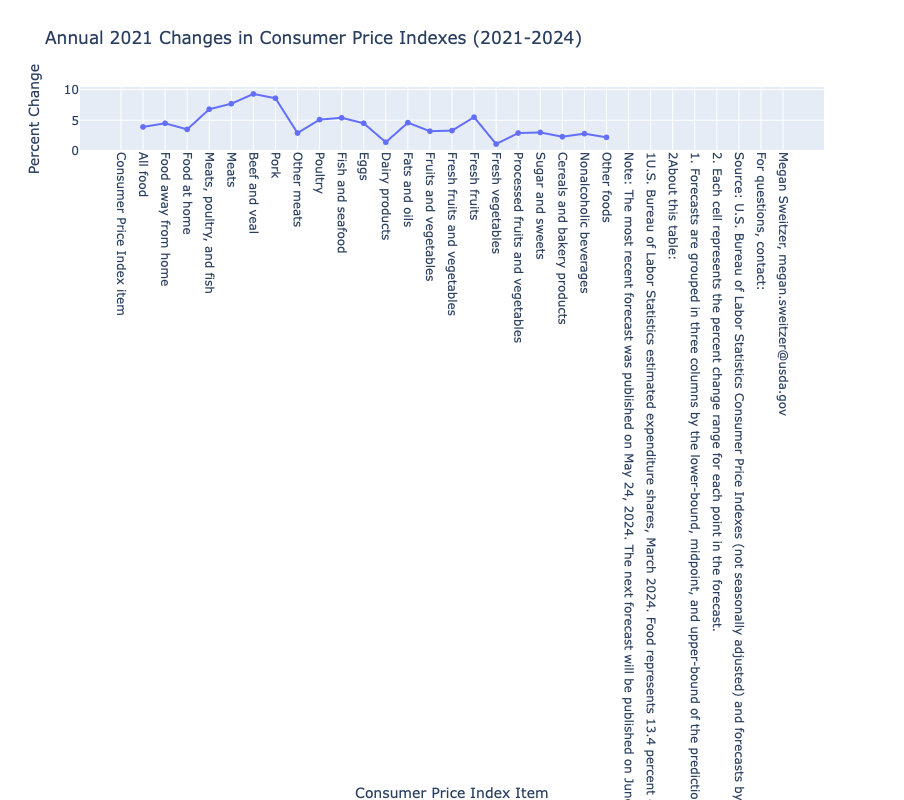

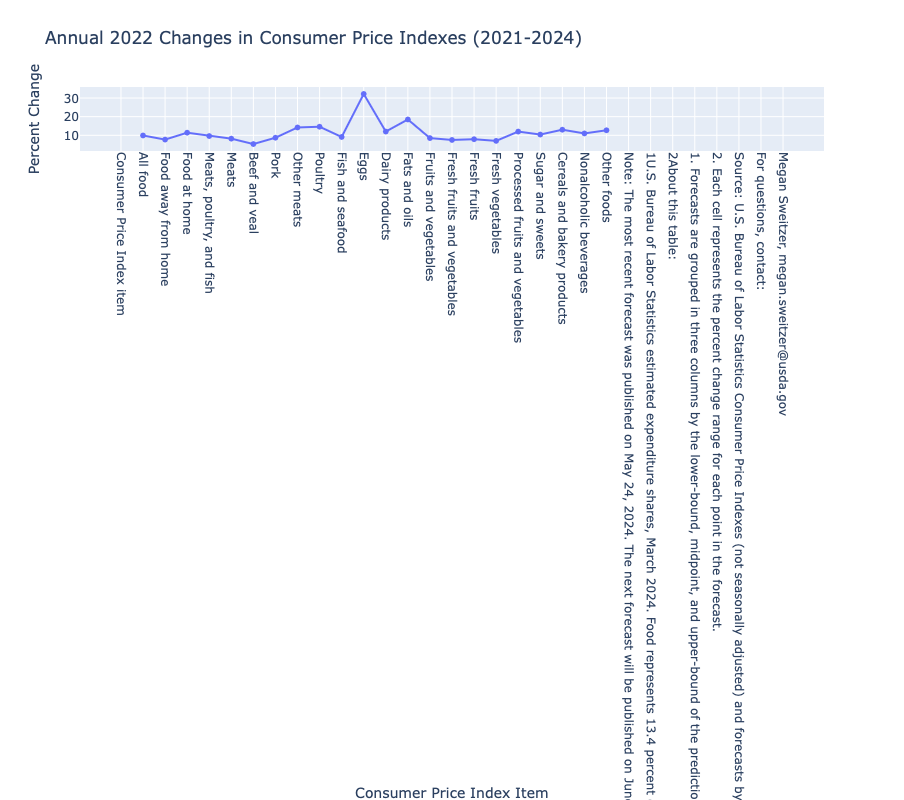

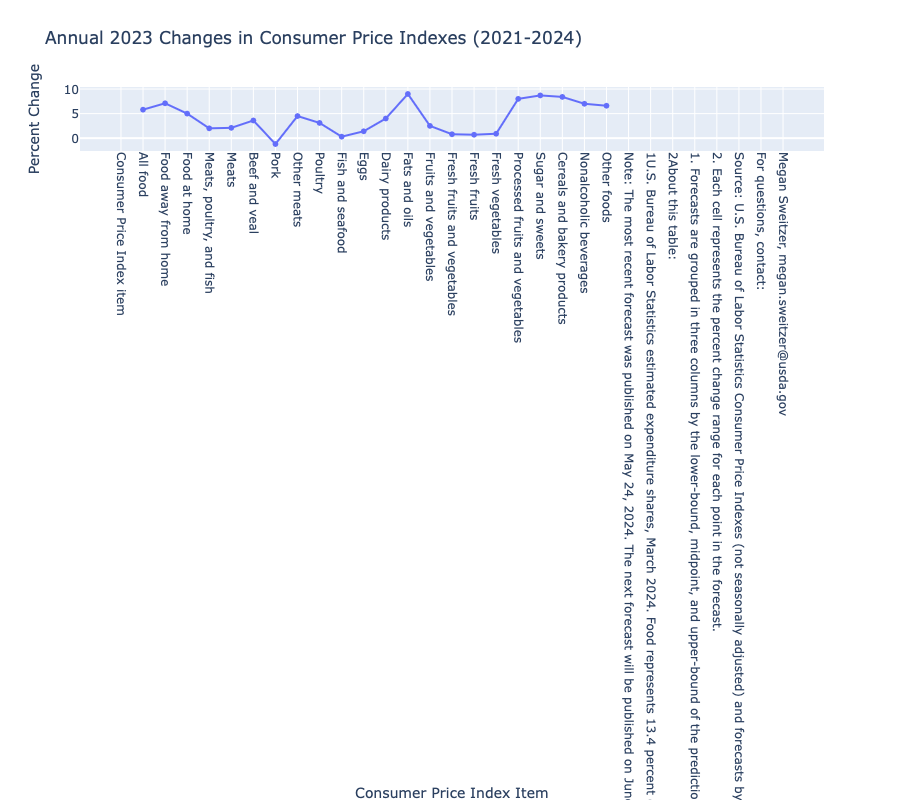

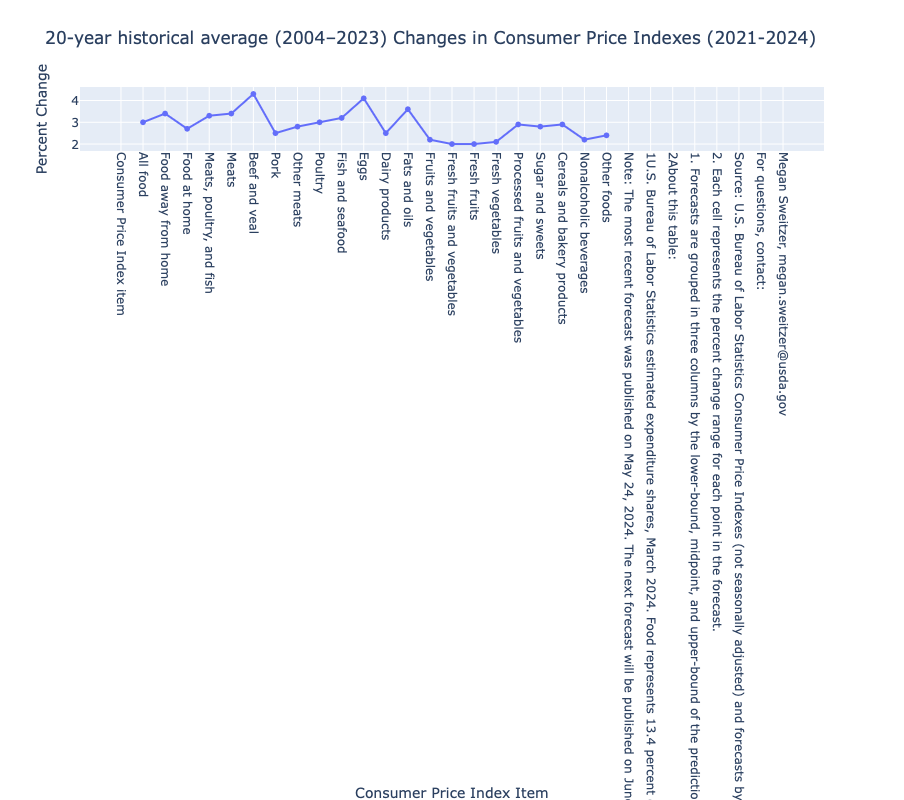

In [39]:
import pandas as pd
import plotly.express as px

# Load the Excel file
file_path = 'CPIForecast.xlsx'
data = pd.read_excel(file_path, sheet_name='May 2024 CPI Forecast')

# Clean and organize the data
columns_of_interest = {
    'Month-to-month March 2024 to April 2024': 'Unnamed: 2',
    'Year-over-year April 2023 to April 2024': 'Unnamed: 3',
    'Year-to-date avg. 2024 to avg. 2023': 'Unnamed: 4',
    'Annual 2021': 'Unnamed: 5',
    'Annual 2022': 'Unnamed: 6',
    'Annual 2023': 'Unnamed: 7',
    '20-year historical average (2004–2023)': 'Unnamed: 8'
}

# Extract relevant columns
df = data[['Changes in Consumer Price Indexes, 2021 through 2024'] + list(columns_of_interest.values())].copy()
df.columns = ['CPI Item'] + list(columns_of_interest.keys())

# Drop rows with NaN values in the first column to clean up the dataset
df = df.dropna(subset=['CPI Item'])

# Convert percentage change columns to numeric values
for col in columns_of_interest.keys():
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Create individual plots for each statistic
for col in columns_of_interest.keys():
    fig = px.line(df, x='CPI Item', y=col, title=f'{col} Changes in Consumer Price Indexes (2021-2024)', markers=True)
    fig.update_layout(
        xaxis_title='Consumer Price Index Item',
        yaxis_title='Percent Change',
        xaxis={'tickangle': 90},  # Set x-axis text to vertical
        width=1400,  # Adjust width
        height=800   # Adjust height
    )
    fig.show()
